Time series is a sequence of observations recorded at regular time intervals.

Depending on the frequency of observations, a time series may typically be hourly, daily, weekly, monthly, quarterly and annual. Sometimes, you might have seconds and minute-wise time series as well, like, number of clicks and user visits every minute, etc.

Time series analysis involves understanding various aspects of the inherent nature of the series so that you are better informed to create meaningful and accurate forecasts.

Time series analysis is the preparatory step before you develop a forecast of the series. The more you learn about the data, the better the forecast.



The Basic Steps in a Forecasting Task
**bold text**

**Problem definition**. Often this is the most difficult part of forecasting. Defining the problem carefully requires an understanding of the way the forecasts will be used, who requires the forecasts, and how the forecasting function fits within the organization requiring the forecasts. A forecaster needs to spend time talking to everyone who will be involved in collecting data, maintaining databases, and using the forecasts for future planning.

**Gathering information** :- There are always at least two kinds of information required: (a) statistical data, and (b) the accumulated expertise of the people who collect the data and use the forecasts. Often, it will be difficult to obtain enough historical data to be able to fit a good statistical model. Occasionally, old data will be less useful due to structural changes in the system being forecast; then we may choose to use only the most recent data. However, remember that a good statistical model will handle evolutionary changes in the system; don’t throw away good data unnecessarily.

**Exploratory analysis**. Always start by graphing the data. Are there consistent patterns? Is there a significant trend? Is seasonality important? Is there evidence of the presence of business cycles? Are there any outliers in the data that need to be explained by those with expert knowledge? How strong are the relationships among the variables available for analysis? Various tools have been developed to help with this analysis.

Choosing and fitting models. The best model to use depends on the availability of historical data, the strength of relationships between the forecast variable and any explanatory variables, and the way in which the forecasts are to be used. It is common to compare two or three potential models. Each model is itself an artificial construct that is based on a set of assumptions (explicit and implicit) and usually involves one or more parameters that must be estimated using the known historical data.

**Using and evaluating a forecasting model**. Once a model has been selected and its parameters estimated, the model is used to make forecasts. The performance of the model can only be properly evaluated after the data for the forecast period has become available. A number of methods have been developed to help in assessing the accuracy of forecasts. There are also organizational issues in using and acting on the forecasts.

In [44]:
#Import libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss, acf, grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot
from scipy import signal
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
#Import Data
df_train = pd.read_csv("/content/train_E1GspfA.csv")
df_test = pd.read_csv("/content/test_6QvDdzb.csv")

In [46]:
# checking the first row 
df_train.head()

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


In [47]:
# checking the data shape of training data
df_train.shape

(18247, 3)

In [48]:
#checking the rows and columns of the test data 
df_test.head()

,date,hour
0,2021-03-01,0
1,2021-03-01,1
2,2021-03-01,2
3,2021-03-01,3
4,2021-03-01,5


In [49]:
#checking data shape 
df_test.shape

(7650, 2)

In [50]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    18247 non-null  object
 1   hour    18247 non-null  int64 
 2   demand  18247 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 427.8+ KB


In [51]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7650 entries, 0 to 7649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    7650 non-null   object
 1   hour    7650 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.7+ KB


In [52]:
df_train.describe()

,hour,demand
count,18247.000000,18247.000000
mean,12.614731,73.991451
std,6.544963,41.678988
min,0.000000,1.000000
25%,8.000000,43.000000
50%,13.000000,71.000000
75%,18.000000,98.000000
max,23.000000,379.000000


In [53]:
df_test.describe()

,hour
count,7650.000000
mean,12.539085
std,6.620355
min,0.000000
25%,8.000000
50%,13.000000
75%,18.000000
max,23.000000


In [54]:
df_train['date'] = pd.to_datetime(df_train['date'])

In [55]:
print(f"starting date : {str(df_train['date'].dt.date.min())}")
print(f"end date : {str(df_train['date'].dt.date.max())}")

starting date : 2018-08-18
end date : 2021-02-28


In [56]:
def dataPreprocessing(dataFrame):
    dataFrame['date'] = pd.to_datetime(dataFrame['date']) + dataFrame['hour'].astype('timedelta64[h]')
    dataFrame.drop(columns=['hour'], axis=1, inplace=True)
    return dataFrame

In [57]:
df_train = dataPreprocessing(df_train)
df_train.head()

,date,demand
0,2018-08-18 09:00:00,91
1,2018-08-18 10:00:00,21
2,2018-08-18 13:00:00,23
3,2018-08-18 14:00:00,104
4,2018-08-18 15:00:00,81


** Time Plot**

For time-series data, the obvious graph to start with is a time plot. That is, the observations are plotted against the time of observation, with consecutive observations joined by straight lines



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



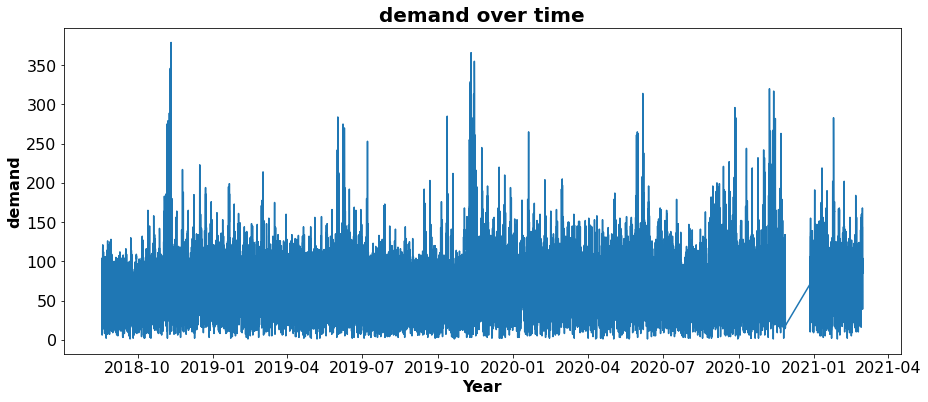

In [58]:
ig, ax = plt.subplots(figsize=(15, 6))
d = df_train
sns.lineplot(d['date'], d['demand'] )

ax.set_title('demand over time', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('demand', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

The monthly data show some seasonality within each year. There is no cyclic behavior and no trend.

**Seasonal Plots**

A seasonal plot is similar to a time plot except that the data are plotted against the individual “seasons” in which the data were observed. The data for each season are overlapped.

Split arrays or matrices into random train and test subsets

Quick utility that wraps input validation and next(ShuffleSplit().split(X, y)) and application to input data into a single call for splitting (and optionally subsampling) data in a oneliner.

In [59]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [60]:
df_train.rename(columns={'date': 'ds', 'demand': 'y'}, inplace=True)
train_data = df_train.sample(frac=0.8, random_state=10)

validation_data = df_train.drop(train_data.index)

print(f'training data size : {train_data.shape}')
print(f'validation data size : {validation_data.shape}')

train_data = train_data.reset_index()
validation_data = validation_data.reset_index()

training data size : (14598, 2)
validation data size : (3649, 2)


**Forecasting by FB Prophet**

There are many forecasting tools available in the market, even Excel worksheet also provides a simple forecasting function, which I have shown how to use it (Yiu, 2019). Other more sophisticated software can provide ARIMA and HP Filter methods for forecasting, but they can be costly.

I learned that FB Prophet provides an open source code and free forecasting tool in R or Python. It allows more detailed parameter settings for making forecasts including three additive components: trend, seasonality and holidays. For more details, one may refer Lyla (2019).

In [61]:
#install FB Prophet and yfinance
!pip install fbprophet
!pip install yfinance
from fbprophet import Prophet

In [62]:
model = Prophet()
model.fit(train_data)

In [63]:
prediction = model.predict(pd.DataFrame({'ds':validation_data['ds']}))
y_actual = validation_data['y']
y_predicted = prediction['yhat']
y_predicted = y_predicted.astype(int)


**Root Mean Square Error (RMSE**) :- is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. Root mean square error is commonly used in climatology, forecasting, and regression analysis to verify experimental results.

In [64]:

from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_actual, y_predicted)
# Calculate and print Root Mean Square Error(RMSE)
RMSE = np.sqrt(MSE)
print("RMSE value: {:.4f}".format(RMSE))

RMSE value: 36.6101


In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(y_actual, y_predicted )

0.007399287476020828

In [66]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=validation_data['ds'], y=y_actual, name="actual targets"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=validation_data['ds'], y=y_predicted, name="predicted targets"),
    secondary_y=True,
)

fig.update_layout(
    title_text="Actual vs Predicted Targets"
)

fig.update_xaxes(title_text="Timeline")
fig.update_yaxes(title_text="<b>actual</b> targets", secondary_y=False)
fig.update_yaxes(title_text="<b>predicted</b> targets", secondary_y=True)

fig.show()

In [67]:
df_test = pd.read_csv("/content/test_6QvDdzb.csv")

test = dataPreprocessing(df_test.copy())
test.head()

,date
0,2021-03-01 00:00:00
1,2021-03-01 01:00:00
2,2021-03-01 02:00:00
3,2021-03-01 03:00:00
4,2021-03-01 05:00:00


In [71]:
df_test_pred = model.predict(pd.DataFrame({'ds':test['date']}))

In [72]:
df_test_pred  = df_test_pred ['yhat']
df_test_pred  = df_test_pred .astype(int)
df_test['demand'] = df_test_pred
df_test.head()
df_test.to_csv('submission.csv', index=False)

In [74]:
df_test.to_csv('submission.csv', index=False)